In [17]:
 !pip install pandas_datareader

^C


In [26]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import pandas_datareader as pdr
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [19]:
df = pd.read_excel('../data/ceosal1.xls', index_col=0)
df.head()

,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
salary,,,,,,,,,,,
1095,20,27595.0,14.1,106.4,191,1,0,0,0,6.998509,10.225390
1001,32,9958.0,10.9,-30.6,13,1,0,0,0,6.908755,9.206132
1122,9,6125.9,23.5,-16.3,14,1,0,0,0,7.022868,8.720281
578,-9,16246.0,5.9,-25.7,-21,1,0,0,0,6.359574,9.695602
1368,7,21783.2,13.8,-3.0,56,1,0,0,0,7.221105,9.988894


In [20]:
df.describe()

,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,13.282297,6923.793301,17.184211,10.800478,61.803828,0.320574,0.220096,0.287081,0.172249,6.950386,8.292265
std,32.633921,10633.271159,8.518509,97.219400,68.177052,0.467818,0.415306,0.453486,0.378503,0.566374,1.013160
min,-61.000000,175.200000,0.500000,-98.900000,-58.000000,0.000000,0.000000,0.000000,0.000000,5.407172,5.165928
25%,-1.000000,2210.300000,12.400000,-21.200000,21.000000,0.000000,0.000000,0.000000,0.000000,6.601230,7.700883
50%,9.000000,3705.200000,15.500000,-3.000000,52.000000,0.000000,0.000000,0.000000,0.000000,6.946014,8.217492
75%,20.000000,7177.000000,20.000000,19.500000,81.000000,1.000000,0.000000,1.000000,0.000000,7.249215,8.878636
max,212.000000,97649.900000,56.300000,977.000000,418.000000,1.000000,1.000000,1.000000,1.000000,9.603868,11.489140


In [21]:
mean = df.mean()
std = df.std()
med = df.median()
print("Mean: ", mean)
print('\n')
print("Std: ", std)
print('\n')
print("Median: ", med)

Mean:  pcsalary      13.282297
sales       6923.793301
roe           17.184211
pcroe         10.800478
ros           61.803828
indus          0.320574
finance        0.220096
consprod       0.287081
utility        0.172249
lsalary        6.950386
lsales         8.292265
dtype: float64


Std:  pcsalary       32.633921
sales       10633.271159
roe             8.518509
pcroe          97.219400
ros            68.177052
indus           0.467818
finance         0.415306
consprod        0.453486
utility         0.378503
lsalary         0.566374
lsales          1.013160
dtype: float64


Median:  pcsalary       9.000000
sales       3705.200000
roe           15.500000
pcroe         -3.000000
ros           52.000000
indus          0.000000
finance        0.000000
consprod       0.000000
utility        0.000000
lsalary        6.946014
lsales         8.217492
dtype: float64


Text(0.5, 1.0, 'Scatter Plot CEO Salary and Sales of Firms')

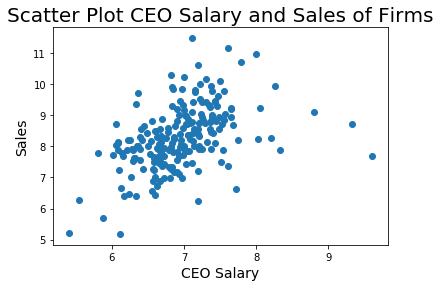

In [22]:
plt.scatter(df.lsalary, df.lsales, marker='o')
plt.xlabel('CEO Salary', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Scatter Plot CEO Salary and Sales of Firms', fontsize=20)

In [23]:
X = df['lsales'].values
y = df['lsalary'].values
X_data = sm.add_constant(X, has_constant='add')

In [24]:
model = sm.OLS(y, X_data)
fitted_model = model.fit()

In [25]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.30
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.70e-12
Time:                        14:04:06   Log-Likelihood:                -152.50
No. Observations:                 209   AIC:                             309.0
Df Residuals:                     207   BIC:                             315.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8220      0.288     16.723      0.000       4.254       5.390
x1             0.2567      0.035      7.436      0.000       0.189       0.325
==============================================================================
Omnibus:                       84.151   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.831
Skew:                           1.507   Prob(JB):                     2.04e-88
Kurtosis:                       9.106   Cond. No.                         70.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""